In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/data_oversame.csv
./data/Heart.csv


In [336]:
#data = pd.read_csv('./data/data_oversame.csv')
data = pd.read_csv('./data/Heart.csv')
target = 'TenYearCHD'
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Dealing with missing values

In [337]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [338]:
missing_cols = [x for x in data.columns if data[x].isna().sum()>0]
missing_cols

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

In [353]:
for x in missing_cols:
    print(x,'\n',data[x].value_counts(),'\n')

education 
 1.0    1720
2.0    1253
3.0     687
4.0     473
0.0     105
Name: education, dtype: int64 

cigsPerDay 
 0.000000     2144
20.000000     734
30.000000     217
15.000000     210
10.000000     143
9.000000      130
5.000000      121
3.000000      100
40.000000      80
1.000000       67
43.000000      56
25.000000      55
9.003089       29
35.000000      22
6.000000       18
2.000000       18
7.000000       12
60.000000      11
8.000000       11
4.000000        9
18.000000       8
17.000000       7
23.000000       6
50.000000       6
11.000000       5
12.000000       3
13.000000       3
45.000000       3
16.000000       3
14.000000       2
19.000000       2
29.000000       1
38.000000       1
70.000000       1
Name: cigsPerDay, dtype: int64 

BPMeds 
 0.0    4061
1.0     124
Name: BPMeds, dtype: int64 

totChol 
 240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
432.0     1
385.0     1
363.0     1
362.0     1
347.0     1
Name: totChol, Length: 248, dtype:

In [340]:
data['education'].describe()

count    4133.000000
mean        1.978950
std         1.019791
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: education, dtype: float64

In [344]:
data['education'].fillna(0,inplace=True)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
33,1,61,0.0,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,0.0,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
72,0,37,0.0,0,0.0,0.0,0,0,0,200.0,119.0,79.0,33.29,67.0,87.0,0
184,1,67,0.0,0,0.0,0.0,0,0,0,257.0,125.0,67.5,25.95,65.0,69.0,0
213,0,34,0.0,0,0.0,0.0,0,0,0,163.0,107.0,71.0,23.88,73.0,80.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,1,47,0.0,0,0.0,0.0,0,1,0,254.0,137.5,91.0,31.98,75.0,69.0,0
4098,1,37,0.0,1,20.0,0.0,0,0,0,184.0,113.0,81.0,22.16,85.0,63.0,0
4121,0,55,0.0,0,0.0,0.0,0,0,0,240.0,145.0,96.0,26.27,72.0,NaN,0
4122,1,69,0.0,1,23.0,0.0,0,1,0,186.0,179.0,93.0,26.64,72.0,67.0,0


In [346]:
data['cigsPerDay'].describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [350]:
data['cigsPerDay'].mean()

9.003088619624615

In [354]:
data['cigsPerDay_na'] = np.where(data['cigsPerDay'].isna(),1,0 )
data['cigsPerDay'].fillna(data['cigsPerDay'].mean(),inplace=True)

In [355]:
data['BPMeds_na'] = np.where(data['BPMeds'].isna(),1,0 )
data['BPMeds'].fillna(1,inplace=True)

In [356]:
data['totChol'].describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [359]:
data['totChol'].mean()

236.72158548233045

In [360]:
data['totChol_na'] = np.where(data['totChol'].isna(),1,0 )
data['totChol'].fillna(data['totChol'].mean(),inplace=True)

In [361]:
data['BMI'].describe()

count    4219.000000
mean       25.802008
std         4.080111
min        15.540000
25%        23.070000
50%        25.400000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64

In [362]:
data['BMI'].median()

25.4

In [363]:
data['BMI_na'] = np.where(data['BMI'].isna(),1,0 )
data['BMI'].fillna(data['BMI'].mean(),inplace=True)

In [366]:
# heartRate

In [364]:
data['heartRate'].describe()

count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [367]:
data['heartRate'].median()

75.0

In [368]:
data['heartRate_na'] = np.where(data['heartRate'].isna(),1,0 )
data['heartRate'].fillna(data['heartRate'].mean(),inplace=True)

In [369]:
data['glucose'].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [370]:
data['glucose'].median()

78.0

In [371]:
data['glucose_na'] = np.where(data['glucose'].isna(),1,0 )
data['glucose'].fillna(data['glucose'].mean(),inplace=True)

In [373]:
data.shape

(4238, 22)

In [374]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsPerDay_na,BPMeds_na,totChol_na,BMI_na,heartRate_na,glucose_na
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0,0,0,0,0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0,0,0,0,0,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0,0,0,0,0,0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1,0,0,0,0,0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1,0,0,0,0,0,0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0,0,0,0,0,0,0
4235,0,48,2.0,1,20.0,1.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0,0,1,0,0,0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0,0,0,0,0,0,1


In [376]:
data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
cigsPerDay_na      0
BPMeds_na          0
totChol_na         0
BMI_na             0
heartRate_na       0
glucose_na         0
dtype: int64

In [377]:
#outliers

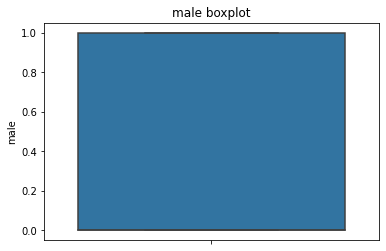

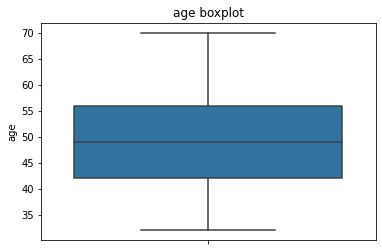

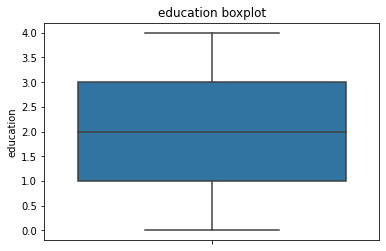

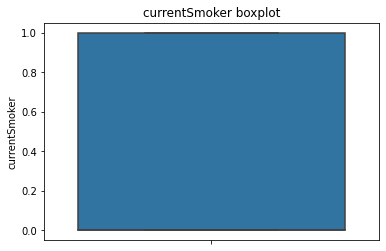

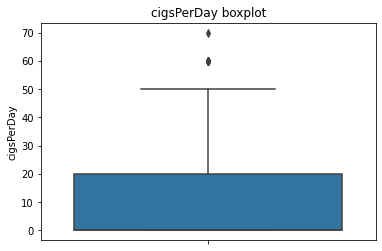

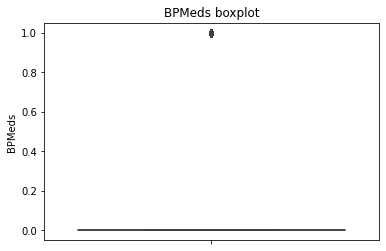

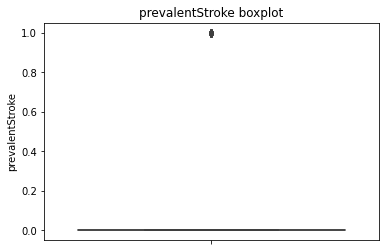

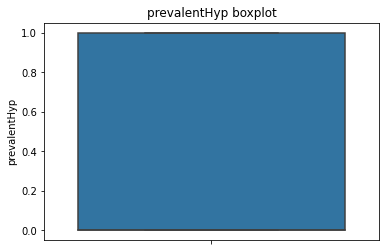

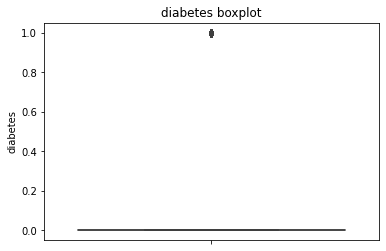

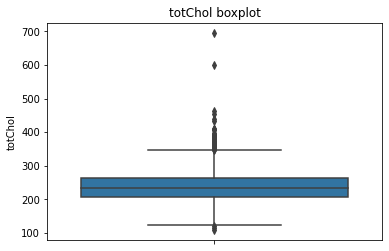

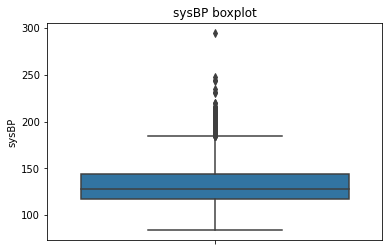

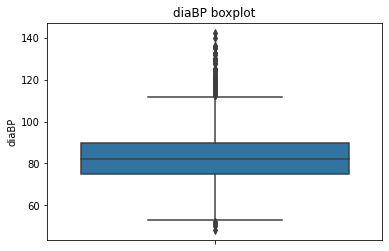

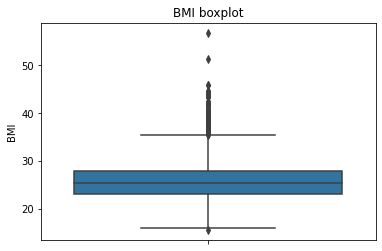

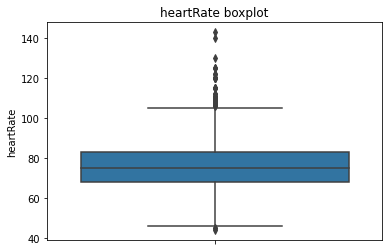

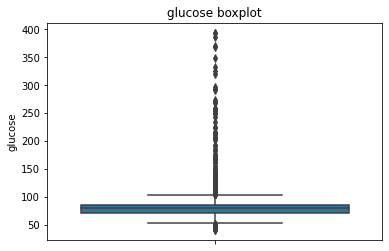

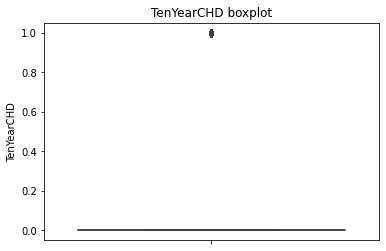

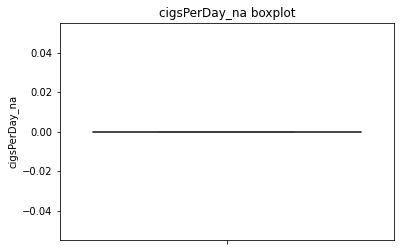

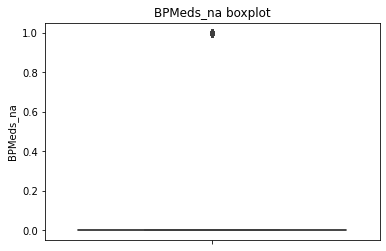

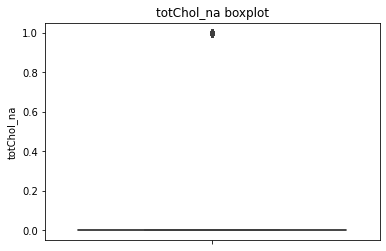

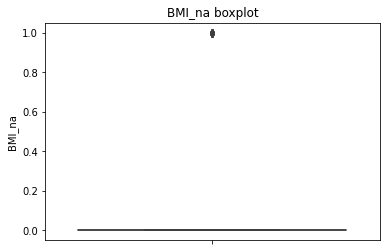

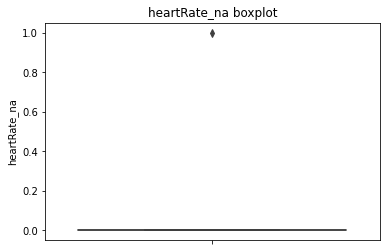

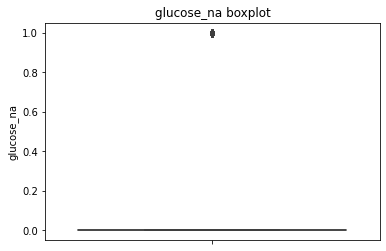

In [378]:
for y in data.columns:
    sns.boxplot(data=data,y=y)
    plt.title("{} boxplot".format(y))
    plt.show()

In [379]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'cigsPerDay_na',
       'BPMeds_na', 'totChol_na', 'BMI_na', 'heartRate_na', 'glucose_na'],
      dtype='object')

In [380]:
out_cols = ['cigsPerDay','totChol','sysBP',
       'diaBP', 'BMI','heartRate', 'glucose', 'TenYearCHD']

In [381]:
data[out_cols].describe()

,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,11.879230,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,20.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [382]:
max_cig = data['cigsPerDay'].quantile(.99)
data[data['cigsPerDay'] > max_cig]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsPerDay_na,BPMeds_na,totChol_na,BMI_na,heartRate_na,glucose_na
327,1,56,1.0,1,60.0,0.0,0,0,0,246.0,125.0,79.0,29.64,70.0,85.000000,0,0,0,0,0,0,0
447,1,46,4.0,1,45.0,0.0,0,0,0,209.0,112.5,65.0,27.48,75.0,78.000000,0,0,0,0,0,0,0
467,1,53,1.0,1,50.0,0.0,0,0,0,306.0,127.0,82.5,31.22,72.0,81.966753,0,0,0,0,0,0,1
721,1,59,1.0,1,60.0,0.0,0,1,0,298.0,153.5,105.0,25.05,70.0,84.000000,0,0,0,0,0,0,0
1054,1,58,2.0,1,60.0,0.0,0,1,0,250.0,150.0,97.0,32.00,75.0,65.000000,0,0,0,0,0,0,0
1360,1,47,2.0,1,50.0,0.0,0,0,0,217.0,145.0,89.0,28.88,82.0,75.000000,0,0,0,0,0,0,0
1452,1,39,1.0,1,60.0,0.0,0,0,0,215.0,112.0,65.0,23.60,59.0,78.000000,0,0,0,0,0,0,0
1463,1,51,1.0,1,50.0,0.0,0,0,0,335.0,125.5,94.0,27.77,80.0,67.000000,0,0,0,0,0,0,0
1468,1,50,1.0,1,60.0,0.0,0,1,0,340.0,134.0,95.0,30.46,85.0,86.000000,0,0,0,0,0,0,0
1488,1,37,4.0,1,60.0,0.0,0,0,0,254.0,122.5,82.5,23.87,88.0,83.000000,0,0,0,0,0,0,0


In [383]:
df = data[data['cigsPerDay'] < max_cig]
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsPerDay_na,BPMeds_na,totChol_na,BMI_na,heartRate_na,glucose_na
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0,0,0,0,0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0,0,0,0,0,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0,0,0,0,0,0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1,0,0,0,0,0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.000000,1,0,0,0,0,0,0
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1,0,0,0,0,0,0
4235,0,48,2.0,1,20.0,1.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0,0,1,0,0,0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0,0,0,0,0,0,1


# totChol

Text(0.5, 1.0, 'To Chol boxplot')

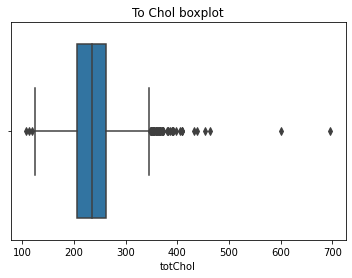

In [384]:
sns.boxplot(x=df['totChol'])
plt.title('To Chol boxplot')

In [385]:
df['totChol'].describe()

count    4161.000000
mean      236.615323
std        44.394606
min       107.000000
25%       206.000000
50%       234.000000
75%       262.000000
max       696.000000
Name: totChol, dtype: float64

In [386]:
max_chol = df['totChol'].quantile(.98)
#df[df['totChol'] > max_chol]

In [387]:
df['totChol'].quantile(.05)

170.0

In [388]:
min_chol = df['totChol'].quantile(.05)
df[df['totChol'] < min_chol]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsPerDay_na,BPMeds_na,totChol_na,BMI_na,heartRate_na,glucose_na
134,0,50,3.0,1,15.0,0.0,0,0,0,150.0,121.0,84.0,28.69,75.0,88.0,0,0,0,0,0,0,0
142,1,40,3.0,0,0.0,0.0,0,0,0,154.0,117.5,72.5,26.82,80.0,87.0,0,0,0,0,0,0,0
159,0,46,3.0,0,0.0,0.0,0,0,0,165.0,108.0,81.0,24.19,80.0,72.0,0,0,0,0,0,0,0
160,0,36,3.0,1,20.0,0.0,0,0,0,159.0,121.5,73.0,20.41,72.0,75.0,0,0,0,0,0,0,0
166,1,39,2.0,0,0.0,0.0,0,0,0,167.0,109.0,78.0,21.19,68.0,71.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,1,41,2.0,1,15.0,0.0,0,0,1,155.0,107.0,81.0,20.96,90.0,191.0,0,0,0,0,0,0,0
4066,1,47,2.0,1,20.0,0.0,0,0,0,119.0,117.0,78.5,26.40,75.0,78.0,0,0,0,0,0,0,0
4118,0,37,2.0,0,0.0,0.0,0,0,0,160.0,137.0,82.0,21.03,94.0,113.0,0,0,0,0,0,0,0
4120,1,40,1.0,1,40.0,0.0,0,0,0,169.0,127.0,81.0,25.82,80.0,83.0,0,0,0,0,0,0,0


In [389]:
df2 = df[(df['totChol'] < max_chol) & (df['totChol'] > min_chol)]


<AxesSubplot:xlabel='totChol'>

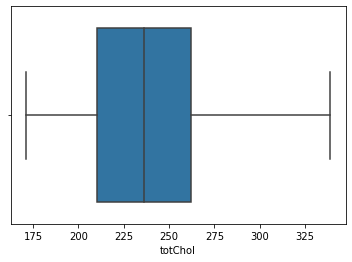

In [390]:
sns.boxplot(x=df2['totChol'])

In [391]:
df2[out_cols].describe()

,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000,3853.000000
mean,8.298230,238.195006,132.575136,83.011549,25.844390,75.808949,81.971260,0.151311
std,10.823905,36.395177,21.930922,11.866592,4.051505,11.907477,22.111866,0.358398
min,0.000000,171.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,210.000000,117.000000,75.000000,23.100000,68.000000,72.000000,0.000000
50%,0.000000,236.000000,128.500000,82.000000,25.450000,75.000000,80.000000,0.000000
75%,20.000000,262.000000,144.000000,90.000000,28.060000,83.000000,85.000000,0.000000
max,40.000000,339.000000,295.000000,140.000000,56.800000,143.000000,394.000000,1.000000


# sysBP

<AxesSubplot:xlabel='sysBP'>

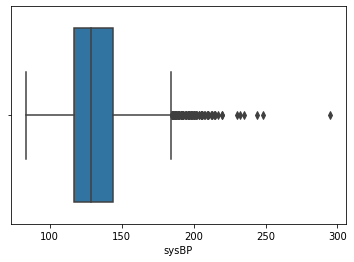

In [392]:
sns.boxplot(x=df2['sysBP'])

In [393]:
df2['sysBP'].describe()

count    3853.000000
mean      132.575136
std        21.930922
min        83.500000
25%       117.000000
50%       128.500000
75%       144.000000
max       295.000000
Name: sysBP, dtype: float64

In [394]:
max_bp = df2['sysBP'].quantile(.9)
df3=df2[df2['sysBP'] < max_bp]

<AxesSubplot:xlabel='sysBP'>

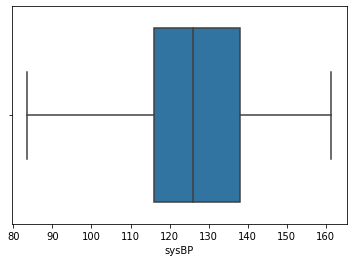

In [395]:
sns.boxplot(x=df3['sysBP'])

# diaBP

In [396]:
df3['diaBP'].describe()

count    3458.000000
mean       80.910931
std         9.764401
min        50.000000
25%        74.000000
50%        80.500000
75%        87.000000
max       120.000000
Name: diaBP, dtype: float64

<AxesSubplot:xlabel='diaBP'>

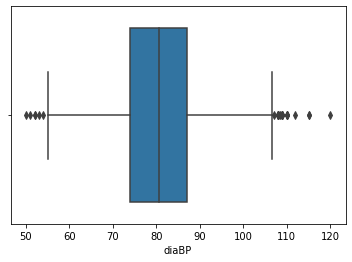

In [397]:
sns.boxplot(x=df3['diaBP'])

In [398]:
min_dia = df3['diaBP'].quantile(.04)
min_dia

64.64

In [399]:
max_dia = df3['diaBP'].quantile(.93)
max_dia

96.0

In [400]:
df4 = df3[(df3['diaBP'] > min_dia) & (df3['diaBP'] < max_dia)]
df4

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsPerDay_na,BPMeds_na,totChol_na,BMI_na,heartRate_na,glucose_na
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0,0,0,0,0,0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0,0,0,0,0,0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0,0,0,0,0,0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1,0,0,0,0,0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,0,51,3.0,1,20.0,0.0,0,1,0,251.0,140.0,80.0,25.60,75.0,81.966753,0,0,0,0,0,0,1
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.000000,0,0,0,0,0,0,0
4235,0,48,2.0,1,20.0,1.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0,0,1,0,0,0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0,0,0,0,0,0,1


<AxesSubplot:xlabel='diaBP'>

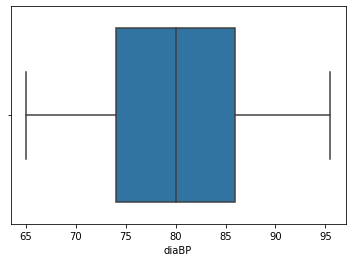

In [401]:
sns.boxplot(x=df4['diaBP'])

In [402]:
df4[out_cols].describe()

,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000
mean,8.531597,237.197023,126.393392,80.243164,25.480318,75.161784,81.092619,0.128255
std,10.859468,36.170390,13.821221,7.486498,3.713278,11.629589,19.150002,0.334428
min,0.000000,171.000000,85.000000,65.000000,15.540000,44.000000,43.000000,0.000000
25%,0.000000,210.000000,116.000000,74.000000,22.980000,67.000000,72.000000,0.000000
50%,0.000000,235.000000,125.250000,80.000000,25.140000,75.000000,79.000000,0.000000
75%,20.000000,261.000000,135.500000,86.000000,27.682500,81.000000,85.000000,0.000000
max,40.000000,339.000000,161.500000,95.500000,43.690000,143.000000,386.000000,1.000000


# BMI 

<AxesSubplot:xlabel='BMI'>

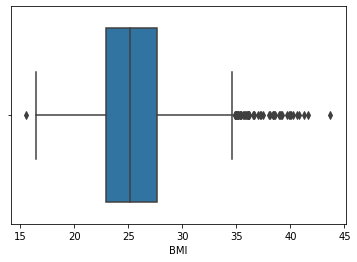

In [403]:
sns.boxplot(x=df4['BMI'])

In [404]:
df4['BMI'].describe()

count    3072.000000
mean       25.480318
std         3.713278
min        15.540000
25%        22.980000
50%        25.140000
75%        27.682500
max        43.690000
Name: BMI, dtype: float64

In [405]:
min_bmi = df4['BMI'].quantile(0.005)
min_bmi

17.5455

In [406]:
df4[df4['BMI'] < min_bmi]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,cigsPerDay_na,BPMeds_na,totChol_na,BMI_na,heartRate_na,glucose_na
186,0,45,4.0,1,15.0,0.0,0,0,0,224.000000,117.0,74.5,16.75,68.0,87.000000,0,0,0,0,0,0,0
320,1,44,1.0,1,20.0,0.0,0,0,0,197.000000,118.0,81.0,17.44,70.0,75.000000,0,0,0,0,0,0,0
377,1,67,1.0,0,0.0,0.0,0,0,0,203.000000,122.0,74.0,15.54,96.0,79.000000,0,0,0,0,0,0,0
538,1,64,2.0,0,0.0,0.0,0,0,0,193.000000,114.0,79.0,16.59,75.0,64.000000,0,0,0,0,0,0,0
555,0,40,2.0,0,0.0,0.0,0,0,0,242.000000,110.0,75.0,16.69,58.0,68.000000,0,0,0,0,0,0,0
762,1,47,4.0,1,9.0,0.0,0,0,0,184.000000,107.0,66.5,16.87,65.0,70.000000,0,0,0,0,0,0,0
1512,0,63,1.0,0,0.0,0.0,0,0,0,222.000000,146.0,78.0,16.92,65.0,74.000000,1,0,0,0,0,0,0
1530,0,48,1.0,0,0.0,0.0,0,0,0,205.000000,112.0,71.0,17.11,73.0,75.000000,0,0,0,0,0,0,0
2168,0,45,2.0,1,20.0,0.0,0,0,0,255.000000,111.0,72.0,17.32,88.0,65.000000,0,0,0,0,0,0,0
2209,0,48,1.0,1,2.0,0.0,0,0,0,236.721585,129.0,90.0,16.61,80.0,81.966753,1,0,0,1,0,0,1


In [407]:
max_bmi = df4['BMI'].quantile(.9)
max_bmi

30.12

In [408]:
df5 = df4[(df4['BMI'] > min_bmi) & (df4['BMI'] < max_bmi)]

<AxesSubplot:xlabel='BMI'>

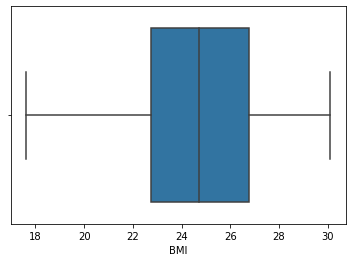

In [409]:
sns.boxplot(x=df5['BMI'])

# heartRate

In [410]:
df5['heartRate'].describe()

count    2747.000000
mean       75.026938
std        11.602013
min        44.000000
25%        67.000000
50%        75.000000
75%        80.000000
max       143.000000
Name: heartRate, dtype: float64

<AxesSubplot:xlabel='heartRate'>

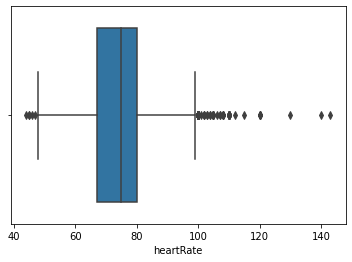

In [411]:
sns.boxplot(x=df5['heartRate'])

In [412]:
min_heart = df5['heartRate'].quantile(0.005)
min_heart

50.0

In [413]:
max_heart = df5['heartRate'].quantile(0.9)
max_heart

90.0

In [414]:
df6 = df5[(df5['heartRate'] > min_heart) & (df5['heartRate'] < max_heart)]

<AxesSubplot:xlabel='heartRate'>

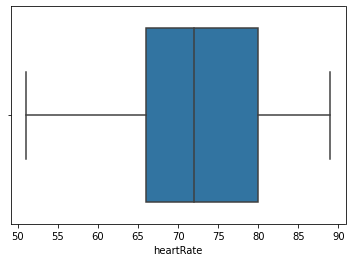

In [415]:
sns.boxplot(x=df6['heartRate'])

# glucose

In [416]:
df6['glucose'].describe()

count    2389.000000
mean       80.485580
std        18.527156
min        43.000000
25%        72.000000
50%        78.000000
75%        85.000000
max       386.000000
Name: glucose, dtype: float64

<AxesSubplot:xlabel='glucose'>

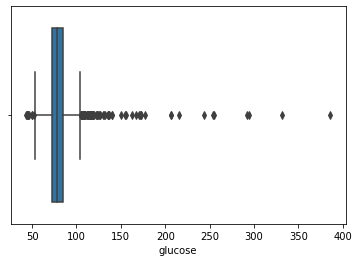

In [417]:
sns.boxplot(x=df6['glucose'])

In [418]:
min_glue = df6['glucose'].quantile(0.005)
min_glue

53.0

In [419]:
max_glue = df6['glucose'].quantile(0.92)
max_glue

98.0

In [420]:
df7 = df6[(df6['glucose'] > min_glue) & (df6['glucose'] < max_glue)]

<AxesSubplot:xlabel='glucose'>

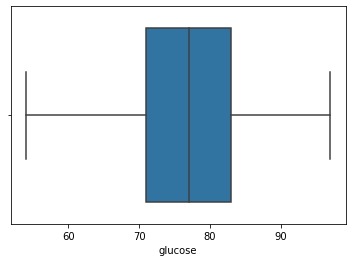

In [421]:
sns.boxplot(x=df7['glucose'])

In [422]:
data_new = df7.copy() 

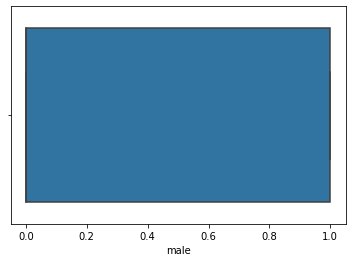

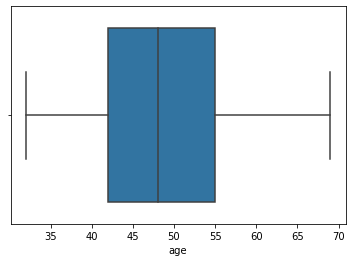

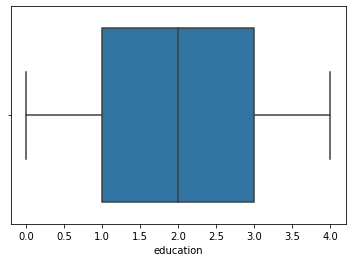

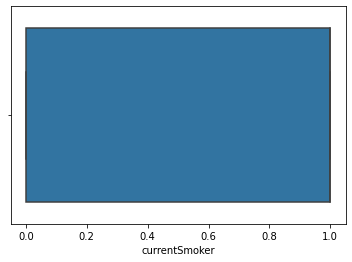

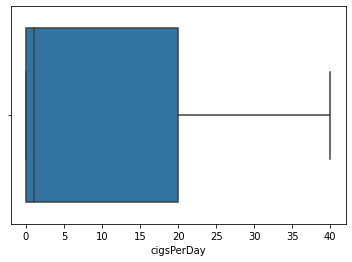

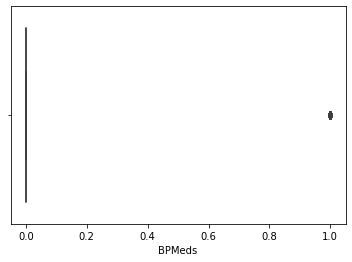

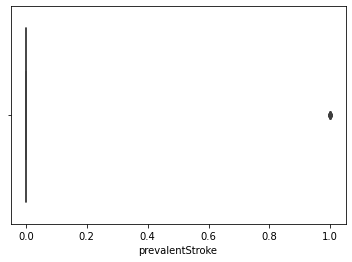

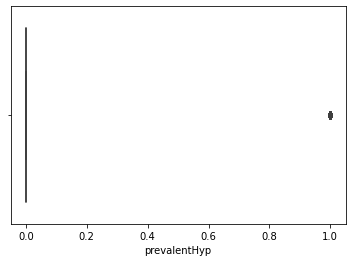

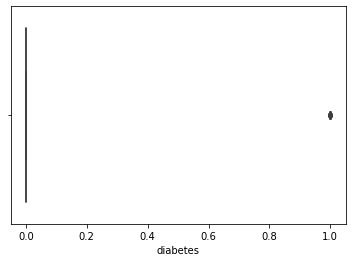

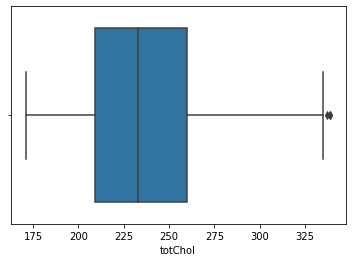

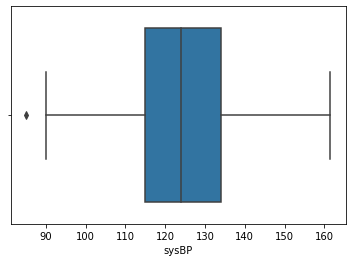

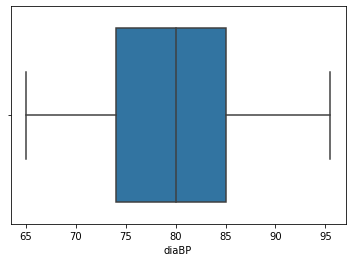

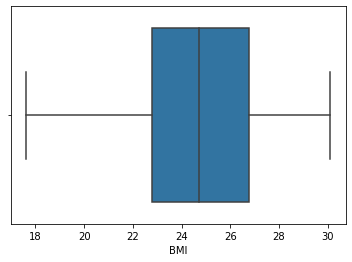

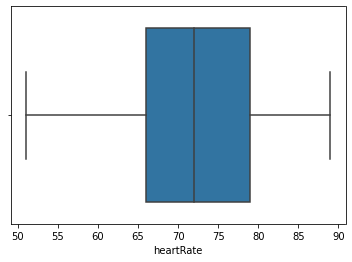

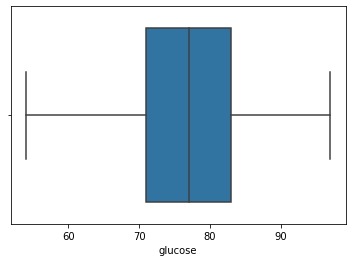

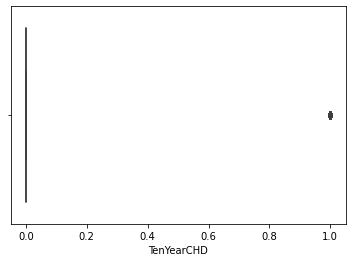

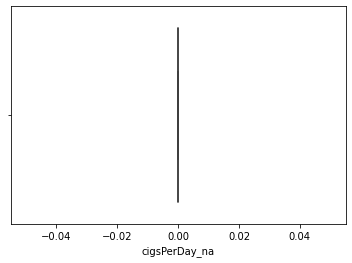

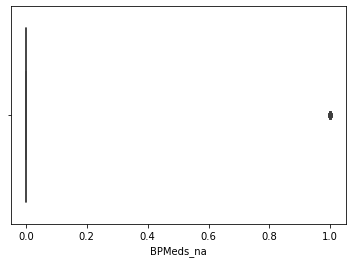

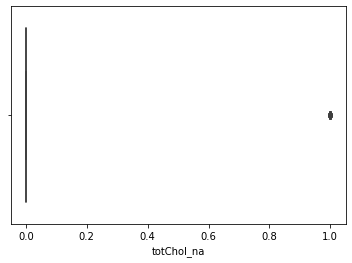

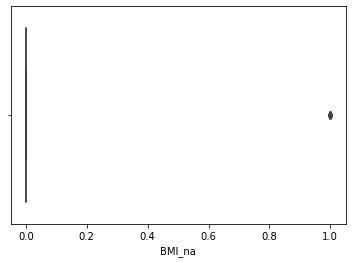

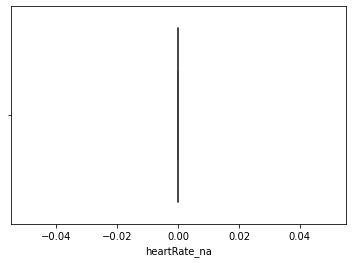

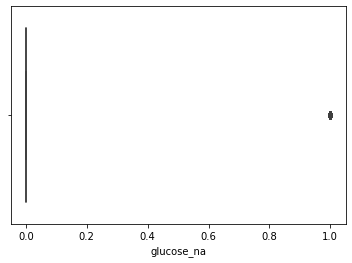

In [423]:
for i in data_new.columns:
    sns.boxplot(x=data_new[i])
    plt.show()


In [424]:
data_new.to_csv('./data/dataset_fe.csv',index=False)

In [425]:
def handle_outlier(data):
    out_cols = ['cigsPerDay','totChol','sysBP',
       'diaBP', 'BMI','heartRate', 'glucose', 'TenYearCHD']

def engineer_model():
    pass